In [18]:
%pylab inline
from scipy.stats import kstest
from scipy.special import erf


Populating the interactive namespace from numpy and matplotlib


In [116]:
x1 = np.random.normal(10, 1.0, 100)
x2 = np.random.normal(10, 4.0, 100)
x3 = np.random.normal(10, 8.0, 100)

(0, 1.1)

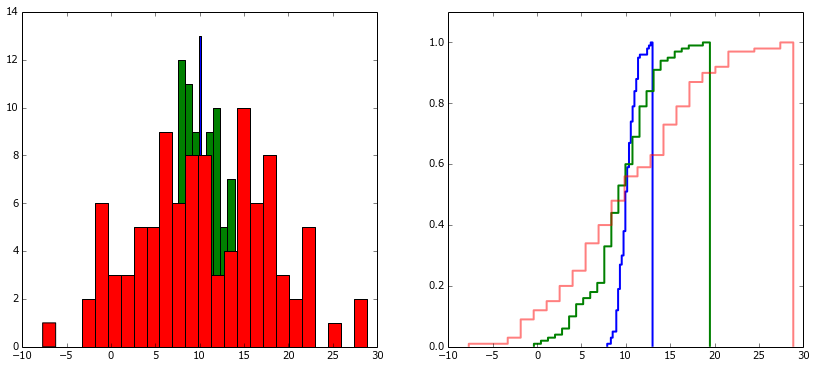

In [139]:
figure(figsize(14, 6))
subplot(1, 2, 1)
h = hist(x1, bins=25)
h = hist(x2, bins=25)
h = hist(x3, bins=25)
subplot(1, 2, 2)
h1 = hist(x1, cumulative=True, histtype='step',lw=2.0, normed=True, bins=25)
h2 = hist(x2, cumulative=True, histtype='step', lw=2.0, normed=True, bins=25)
h3 = hist(x3, cumulative=True, alpha=0.5, histtype='step', lw=2.0, normed=True, bins=25)
ylim(0, 1.1)

In [140]:
D1 = kstest(x3, 'norm')
print D1

(0.84875417883984527, 0.0)


In [141]:
def x_m(x, x_0, sigma_0):
    return (x-x_0) /(np.sqrt(2)*sigma_0)

In [142]:
def cdf_gaussian(x_0, sigma_0):
    X1 = np.linspace(0, 20, 100)
    X1_c = x_m(X1, x_0, sigma_0)
    f1 = erf(X1_c)
    cdf = 0.5*(1+f1)
    return cdf


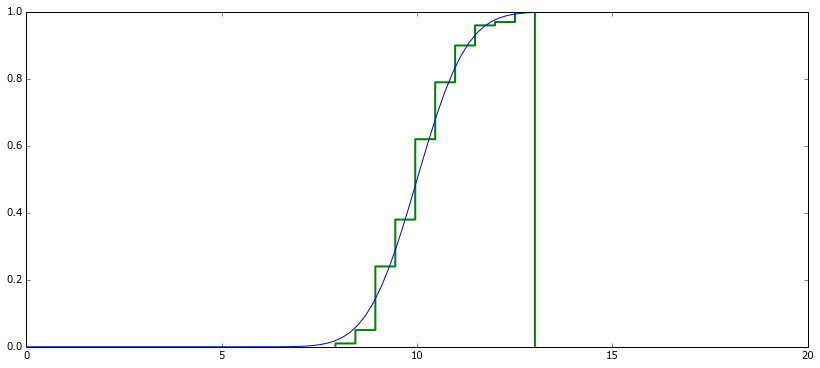

In [143]:
X1 = np.linspace(0, 20, 100)
cdf = cdf_gaussian(10, 1.0)

plot(X1, cdf)
h2 = hist(x1, cumulative=True, histtype='step', lw=2.0, normed=True)


In [144]:
def distance(x, cdf, h):
    # X1 model x
    # cdf model cdf
    # h, data histogram h[0] -> x, h[1]->cdf
    cdf_1s = np.abs(cdf - 0.841)
    index = np.where(cdf_1s == min(cdf_1s))[0]
    #print cdf[index], x[index]
    data_x = np.abs(x[index] - h[1])
    index2 = np.where(data_x == min(data_x))[0]
    #print h[1][index2]
    #print h[0], index2
    if index2==25:
        index2=24
    dist = h[0][index2] - cdf[index]
    #print dist
    #print x[index],cdf[index],  h[1][index2], h[0][index2-1]
    return dist

In [145]:
D_0 = distance(X1, cdf, h2)
print D_0, shape(h2[1])

[ 0.08165107] (11,)


(0, 20)

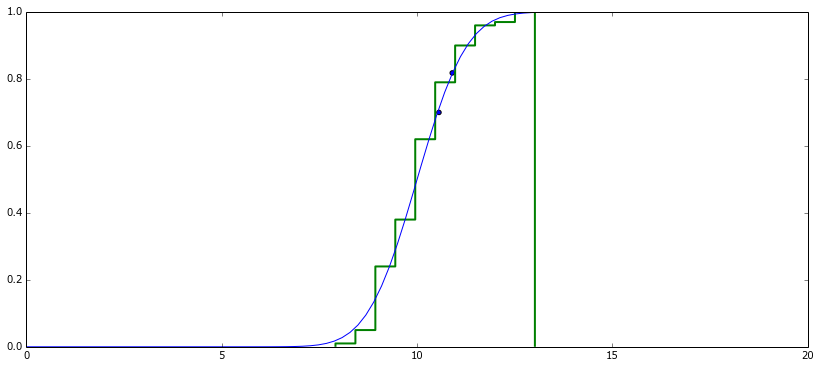

In [146]:
plot(X1, cdf)
h2 = hist(x1, cumulative=True, histtype='step', lw=2.0, normed=True)
scatter(10.9, 0.818)
scatter(10.56, 0.7)
ylim(0, 1)
xlim(0, 20)


In [147]:
def ks_test(D, N):
    l = np.sqrt(N) + 0.12 + 0.11/(np.sqrt(N))*D
    j = np.arange(1, 1000)
    Q = 2.0 * np.sum((-1.0)**(j-1) * np.exp(-2.0*j**2.0*l**2.0))
    return Q

In [148]:
ks_test(D_0, 10)

8.4570373310839394e-10

In [149]:
x_0 = np.linspace(5, 15, 1000)
sigma_0 = np.linspace(0.5, 1.5, 100)
Q = np.zeros([len(x_0), len(sigma_0)])

for i in range(len(x_0)):
    for j in range(len(sigma_0)):
        cdf = cdf_gaussian(x_0[i], sigma_0[j])
        D0 = distance(X1, cdf, h1)
        Q[i][j] = ks_test(D0, 100.0)

In [150]:
Q

array([[  3.17149771e-89,   3.16474691e-89,   3.15816923e-89, ...,
          3.20056244e-89,   3.19821996e-89,   3.19589554e-89],
       [  3.16398416e-89,   3.15728035e-89,   3.15075286e-89, ...,
          3.19820099e-89,   3.19586078e-89,   3.19353881e-89],
       [  3.15635392e-89,   3.14970304e-89,   3.14323134e-89, ...,
          3.19582554e-89,   3.19348782e-89,   3.19116853e-89],
       ..., 
       [  2.09348501e-89,   2.08906141e-89,   2.08471012e-89, ...,
          2.04733654e-89,   2.07606299e-89,   2.07455737e-89],
       [  2.08960558e-89,   2.08516872e-89,   2.08080821e-89, ...,
          2.07616771e-89,   2.07465185e-89,   2.07314613e-89],
       [  2.08564473e-89,   2.08119789e-89,   2.07683134e-89, ...,
          2.07474759e-89,   2.07323162e-89,   2.07172593e-89]])

<matplotlib.contour.QuadContourSet instance at 0x7f6f05b4dc68>

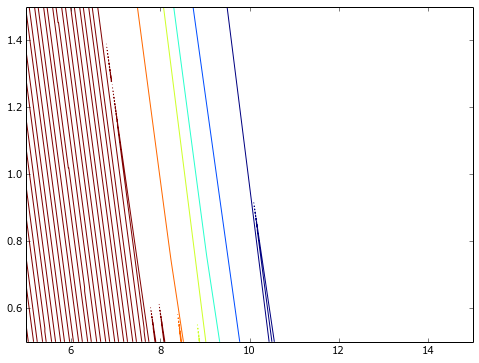

In [153]:
figure(figsize=(8,6))
levels = [1E-10, 1E-8, 1E-6]
contour(x_0, sigma_0, Q.T)

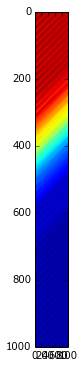

In [154]:
imshow(Q)